<a href="https://colab.research.google.com/github/dipesh261/AI-deep-vision-classifier/blob/main/CNN_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import random
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
# Reshape data to fit the model input shape (batch, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 4. Train the model
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/10
844/844 - 10s - 12ms/step - accuracy: 0.7752 - loss: 0.6260 - val_accuracy: 0.8552 - val_loss: 0.3870
Epoch 2/10
844/844 - 3s - 3ms/step - accuracy: 0.8539 - loss: 0.4112 - val_accuracy: 0.8765 - val_loss: 0.3310
Epoch 3/10
844/844 - 5s - 6ms/step - accuracy: 0.8708 - loss: 0.3578 - val_accuracy: 0.8843 - val_loss: 0.3153
Epoch 4/10
844/844 - 6s - 7ms/step - accuracy: 0.8836 - loss: 0.3235 - val_accuracy: 0.8943 - val_loss: 0.2821
Epoch 5/10
844/844 - 3s - 4ms/step - accuracy: 0.8935 - loss: 0.2988 - val_accuracy: 0.9027 - val_loss: 0.2634
Epoch 6/10
844/844 - 3s - 3ms/step - accuracy: 0.8983 - loss: 0.2801 - val_accuracy: 0.9045 - val_loss: 0.2555
Epoch 7/10
844/844 - 3s - 3ms/step - accuracy: 0.9046 - loss: 0.2632 - val_accuracy: 0.9042 - val_loss: 0.2576
Epoch 8/10
844/844 - 3s - 3ms/step - accuracy: 0.9078 - loss: 0.2523 - val_accuracy: 0.9133 - val_loss: 0.2367
Epoch 9/10
844/844 - 3s - 3ms/step - accuracy: 0.9140 - loss: 0.2347 - val_accuracy: 0.9145 - val_loss: 0.2373

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9101


In [ ]:
# evaluating the model
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9126 - loss: 0.2455


[0.2434556931257248, 0.910099983215332]

In [ ]:
# trainng data distribution of target
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

[0 1 2 3 4 5 6 7 8 9] [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


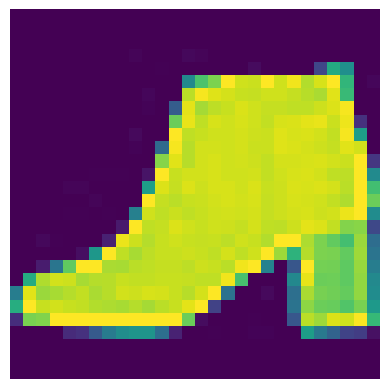

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
Prediction Probabilities: [[2.9590067e-15 1.9805807e-17 8.2555415e-16 1.1647193e-16 6.2029969e-19
  2.5684557e-07 2.8459081e-16 2.0491579e-07 6.6423483e-13 9.9999952e-01]]
The actual image is: Ankle boot
The model has predicted as: Ankle boot


In [ ]:
# Fashion MNIST class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a random image
rdm_img = random.randint(0, len(x_test) - 1)
plt.imshow(x_test[rdm_img])
plt.axis('off')
plt.show()

# Actual label
actual_idx = y_test[rdm_img] # Use original integer labels
actual = class_names[actual_idx]

# Predict label
img_input = x_test[rdm_img].reshape(1, 28, 28, 1)  # Ensure correct shape for Fashion MNIST
y_pred = model.predict(img_input)

# Predicted label
pred_idx = np.argmax(y_pred)
pred = class_names[pred_idx]

# Show prediction
print('Prediction Probabilities:', y_pred)
print('The actual image is:', actual)
print('The model has predicted as:', pred)

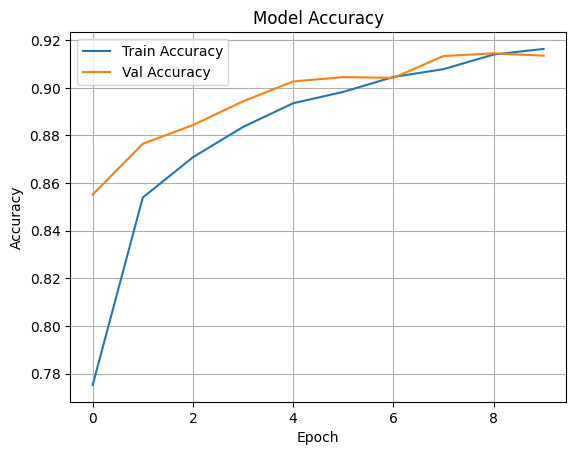

In [ ]:
# 6. Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()